In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [4]:
train_files=glob.glob("C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train/*/**")

In [5]:
len(train_files)

5216

In [6]:
train_files

['C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0135-

In [7]:
train_files[0]

'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg'

In [8]:
train_files[4000]

'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person488_virus_992.jpeg'

In [9]:
train_files[3000]

'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person23_bacteria_91.jpeg'

In [10]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\NORMAL2-IM-0441-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person1604_virus_2782.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person1355_bacteria_3449.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person397_virus_790.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person1579_bacteria_4133.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person500_bacteria_2107.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\NORMAL2-IM-0393-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\NORMAL\\IM-0633-0001.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\person919_bacteria_2844.jpeg',
 'C:/Users/DIBYAJYOTI HALOI/Downloads/archive/chest_xray/train\\PNEUMONIA\\p

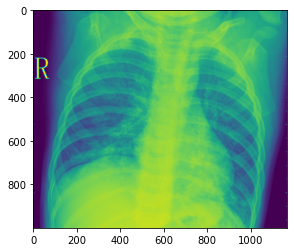

In [11]:
from PIL import Image
img=Image.open(train_files[1000])
plt.imshow(img)

In [12]:
np.array(img).shape

(1000, 1168)

In [13]:
img=img.resize((128,128))

In [14]:
np.array(img).shape

(128, 128)

In [15]:
grey_files=[]

In [16]:
for item in train_files:
    img=Image.open(item).convert('L')
    img.save('greyscale.jpeg')
    grey_files.append(img)

In [17]:
np.array(grey_files[0]).shape

(2363, 2288)

In [18]:
len(grey_files)

5216

In [19]:
modified_files=[]

In [20]:
for item in grey_files:
    img=item.resize((128,128))
    modified_files.append(img)

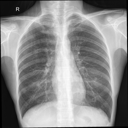

In [21]:
modified_files[0]

In [22]:
np.array(modified_files[0]).shape

(128, 128)

In [23]:
len(modified_files)

5216

In [24]:
X_train=np.zeros((len(modified_files),128,128))
for i,fi in enumerate(modified_files):
    fi_array=np.array(fi)
    if(fi_array.shape[0]==128 and fi_array.shape[1]==128):
        X_train[i,:,:]=fi_array

In [25]:
X_train[0]

array([[ 3.,  4.,  3., ..., 20., 12.,  0.],
       [14., 15., 15., ..., 20., 12.,  0.],
       [14., 15., 15., ..., 20., 12.,  0.],
       ...,
       [ 0.,  2., 16., ..., 21., 22., 21.],
       [ 0.,  2., 16., ...,  9., 10., 10.],
       [ 0.,  2., 16., ...,  0.,  0.,  0.]])

In [26]:
X_train/255.0

array([[[0.01176471, 0.01568627, 0.01176471, ..., 0.07843137,
         0.04705882, 0.        ],
        [0.05490196, 0.05882353, 0.05882353, ..., 0.07843137,
         0.04705882, 0.        ],
        [0.05490196, 0.05882353, 0.05882353, ..., 0.07843137,
         0.04705882, 0.        ],
        ...,
        [0.        , 0.00784314, 0.0627451 , ..., 0.08235294,
         0.08627451, 0.08235294],
        [0.        , 0.00784314, 0.0627451 , ..., 0.03529412,
         0.03921569, 0.03921569],
        [0.        , 0.00784314, 0.0627451 , ..., 0.        ,
         0.        , 0.        ]],

       [[0.04705882, 0.0627451 , 0.05490196, ..., 0.17254902,
         0.18039216, 0.11372549],
        [0.03921569, 0.0627451 , 0.05490196, ..., 0.11372549,
         0.10196078, 0.09019608],
        [0.03921569, 0.05882353, 0.05882353, ..., 0.11372549,
         0.10196078, 0.07843137],
        ...,
        [0.        , 0.        , 0.        , ..., 0.00392157,
         0.00392157, 0.        ],
        [0.0

In [27]:
Y_train=np.zeros((len(train_files)))
for i,fi in enumerate(train_files):
    p=fi.find("NORMAL")
    q=fi.find("virus")
    r=fi.find("bacteria")
    if p!=-1:
        Y_train[i]=0.0
    elif q!=-1:
        Y_train[i]=1.0
    elif r!=-1:
        Y_train[i]=2.0

In [28]:
Y_train

array([0., 1., 2., ..., 0., 2., 2.])

In [29]:
len(Y_train)

5216

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
from tensorflow.keras.layers import BatchNormalization

In [33]:
from keras.layers import Dropout

In [34]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128,128,1)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),strides=1,padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),strides=1,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),strides=1,padding='Same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))

In [35]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0

In [37]:
X_train.shape

(5216, 128, 128)

In [38]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [39]:
model.fit(X_train, Y_train,epochs=5,validation_split=0.1)

Epoch 1/5
147/147 [==============================] - 56s 310ms/step - loss: 1.2118 - accuracy: 0.6813 - val_loss: 0.9072 - val_accuracy: 0.5613
Epoch 2/5
147/147 [==============================] - 45s 303ms/step - loss: 0.5680 - accuracy: 0.7548 - val_loss: 0.4978 - val_accuracy: 0.7375
Epoch 3/5
147/147 [==============================] - 47s 319ms/step - loss: 0.5427 - accuracy: 0.7644 - val_loss: 0.5215 - val_accuracy: 0.7835
Epoch 4/5
147/147 [==============================] - 47s 320ms/step - loss: 0.5082 - accuracy: 0.7729 - val_loss: 0.4256 - val_accuracy: 0.7969
Epoch 5/5
147/147 [==============================] - 46s 312ms/step - loss: 0.4889 - accuracy: 0.7808 - val_loss: 0.4038 - val_accuracy: 0.8238
